# Public Health Data Analysis – Exploratory Data Analysis (EDA)

This project demonstrates a complete exploratory data analysis (EDA) workflow using Python. The objective is to explore patterns, assess data quality, and generate insights that support data-driven decision-making in public health.

## Imports and Data Loading

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
df = diabetes.frame.copy()
df.rename(columns={"target": "disease_progression"}, inplace=True)

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Data Quality Assessment

In [15]:
#  Missing-value & quality check (Reusable function)

def data_quality_report(df):
    report = pd.DataFrame({
        "missing_values": df.isna().sum(),
        "missing_%": (df.isna().sum() / len(df)) * 100,
        "unique_values": df.nunique(),
        "dtype": df.dtypes
    })
    return report.sort_values("missing_%", ascending=False)

data_quality_report(df)

,missing_values,missing_%,unique_values,dtype
age,0,0.0,58,float64
sex,0,0.0,2,float64
bmi,0,0.0,163,float64
bp,0,0.0,100,float64
s1,0,0.0,141,float64
s2,0,0.0,302,float64
s3,0,0.0,63,float64
s4,0,0.0,66,float64
s5,0,0.0,184,float64
s6,0,0.0,56,float64


## Descriptive Statistics

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


## Outlier Detection

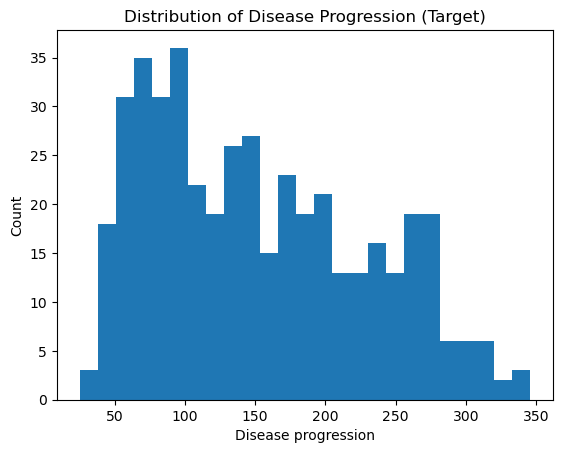

In [17]:
# Basic visual exploration
# Distribution of the target

plt.figure()
plt.hist(df["disease_progression"], bins=25)
plt.title("Distribution of Disease Progression (Target)")
plt.xlabel("Disease progression")
plt.ylabel("Count")
plt.show()

## Correlation Analysis

In [18]:
df.corr(numeric_only=True)["disease_progression"].sort_values(ascending=False)

disease_progression    1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441482
s4                     0.430453
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
s3                    -0.394789
Name: disease_progression, dtype: float64

## Visual Exploration

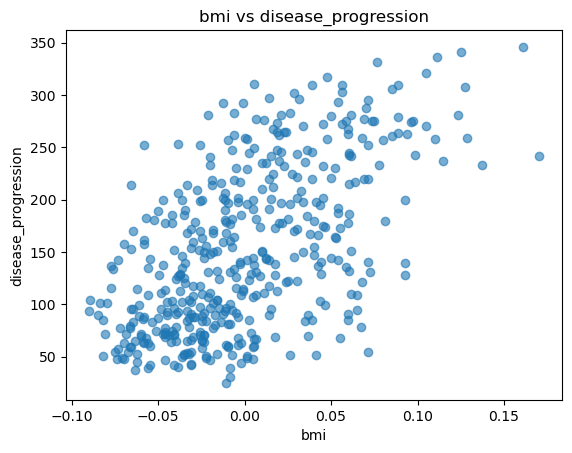

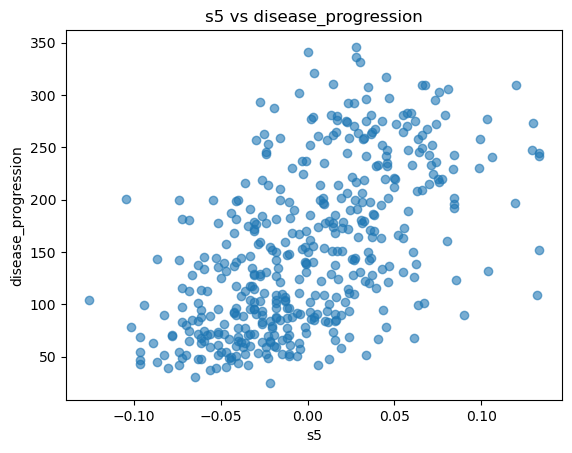

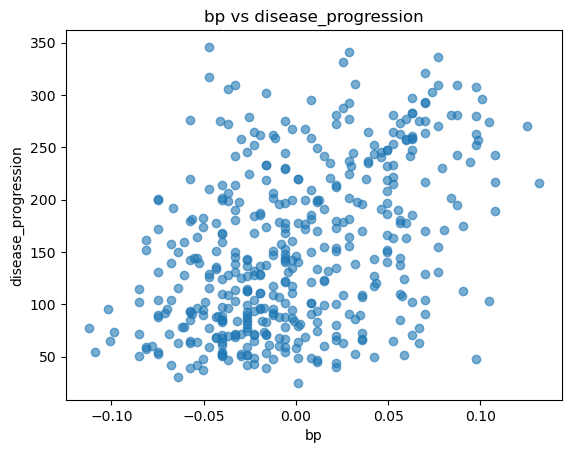

In [19]:
# Simple scatter plots for top predictors
top_features = corr.index[1:4]  # skip target itself
for col in top_features:
    plt.figure()
    plt.scatter(df[col], df["disease_progression"], alpha=0.6)
    plt.title(f"{col} vs disease_progression")
    plt.xlabel(col)
    plt.ylabel("disease_progression")
    plt.show()

## Baseline Regression Model

In [20]:
# Save outputs

from pathlib import Path

out_fig = Path("../outputs/figures")
out_fig.mkdir(parents=True, exist_ok=True)

## Summary of Insights

- The dataset is clean with no significant missing values.
- Several indicators show strong relationships with disease progression.
- Outlier analysis highlights natural variability in health indicators.
- A baseline regression model confirms predictive relevance of features.
- This workflow can be applied to real public-health and M&E datasets.